# **Prevendo Valor da Conta**

### **Objetivo**

* Construir um algoritmo de Machine Learning capaz de prever o valor da conta em um jantar.

### **1. Introdução**

<p align="justify">
O projeto proposto tem como objetivo aplicar técnicas de machine learning, especificamente a regressão linear, para prever o valor da variável "total_bill" em um cenário de restaurante. O conjunto de dados "tips" será a pedra angular desta análise, fornecendo informações valiosas sobre as despesas de refeição, gorjetas, e vários outros fatores influentes. A regressão linear, uma técnica amplamente utilizada na área de aprendizado de máquina, será empregada para estabelecer um modelo que relaciona o valor total da conta ("total_bill") com outras variáveis independentes presentes no conjunto de dados.

<p align="justify">
A previsão do valor da conta total é de extrema relevância para restaurantes e profissionais da indústria de serviços, uma vez que pode proporcionar insights úteis para a gestão de negócios, estratégias de precificação e atendimento ao cliente. Além disso, o projeto busca demonstrar o poder da regressão linear como uma ferramenta valiosa na previsão de resultados quantitativos com base em dados históricos.

In [1]:
# Carregando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
sns.set()

In [3]:
# Carregando base de dados

dados = pd.read_csv('/content/drive/MyDrive/Ciência de Dados com Python/Projetos/Dados/Tips.csv', sep = ',')

In [4]:
# Visualizando dataset

dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### **2. Análise Exporatória de Dados**

In [5]:
# Informação sobre o dataset

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
# Verificando a existência de valores faltantes

dados.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
# Descritiva dos dados

dados.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


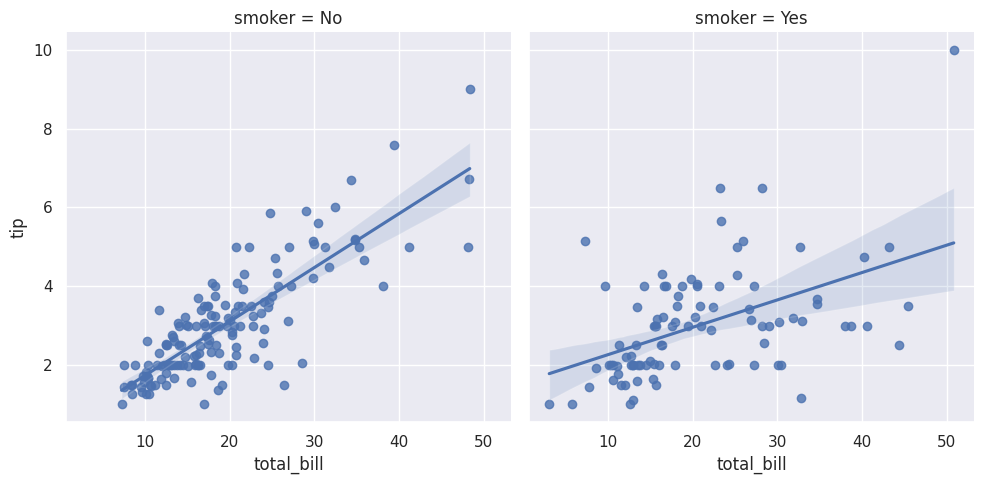

In [8]:
# Gráfico 1: total_bill vs tip por smoker

sns.lmplot(x = 'total_bill',
           y = 'tip',
           data = dados,
           col = 'smoker');

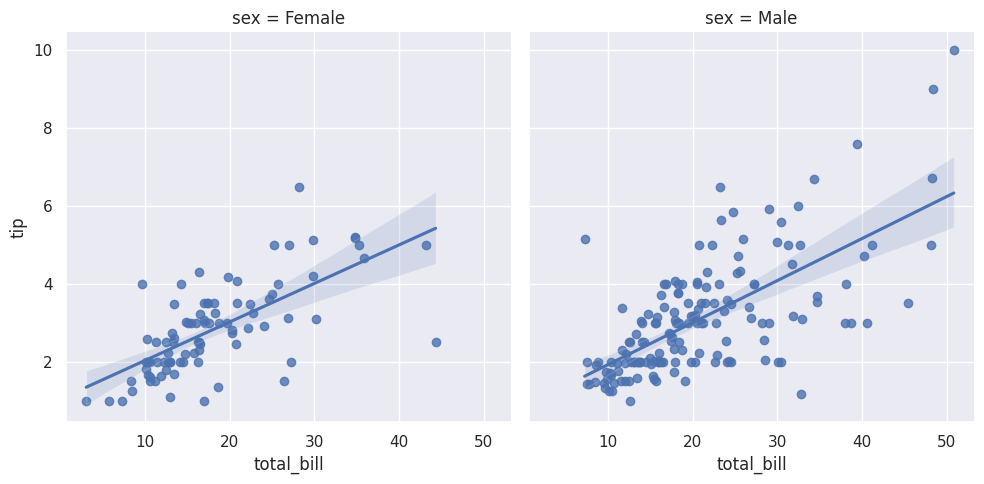

In [9]:
# Gráfico 2: total_bill vs tip por sex

sns.lmplot(x = 'total_bill',
           y = 'tip',
           data = dados,
           col = 'sex');

In [10]:
# Gráfico 3: distribuição dos valores das contas por dia

figure = px.pie(dados,
                values = 'total_bill',
                names = 'day',
                hole = 0.5)

figure.update_layout(title_text = "Distribuição dos Valores das Contas por Dia",
                     title_x = 0.5)

figure.show()

In [11]:
# Gráfico 4: distribuição dos valores das contas por sexo

figure = px.pie(dados,
                values = 'total_bill',
                names = 'sex',
                hole = 0.5)

figure.update_layout(title_text = "Distribuição dos Valores das Contas por Sexo",
                     title_x = 0.5)

figure.show()

In [12]:
# Gráfico 5: distribuição dos valores das contas: fumantes vs não fumantes

figure = px.pie(dados,
                values = 'total_bill',
                names = 'smoker',
                hole = 0.5)

figure.update_layout(title_text = "Distribuição dos Valores das Contas: Fumante vs Não Fumante",
                     title_x = 0.5)

figure.show()

In [13]:
# Gráfico 6: distribuição dos valores das contas por tipo

figure = px.pie(dados,
                values = 'total_bill',
                names = 'time',
                hole = 0.5)

figure.update_layout(title_text = "Distribuição dos Valores das Contas: Dinner vs Lunch",
                     title_x = 0.5)

figure.show()

**Conclusões**

* O final de semana é o periódo mais lucrativo. Juntos, compõe mais de 70% de todo o total arrecadado;
* 2/3 de todo o arrecadado é proveniente de jantares;
* Os não fumantes são os que dão mais gorjetas;
* As pessoas do sexo masculino são os que mais gastam.

### **3. Pré-Processamento de Dados**

In [14]:
# Transformando dados categóricos em numéricos

dados["sex"] = dados["sex"].map({"Female": 0, "Male": 1})
dados["smoker"] = dados["smoker"].map({"No": 0, "Yes": 1})
dados["day"] = dados["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
dados["time"] = dados["time"].map({"Lunch": 0, "Dinner": 1})

In [15]:
# Visualizando base de dados

dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [16]:
# Separando dados em previsores(X) e target(y)

previsores = np.array(dados[["tip", "sex", "smoker",
                             "day", "time", "size"]])

target = np.array(dados['total_bill'])

In [17]:
# Dividindo os dados em treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(previsores,
                                                        target,
                                                        test_size = 0.3,
                                                        random_state = 0)

In [18]:
# Shape dos dados

print(X_treino.shape)
print(y_treino.shape)
print(X_teste.shape)
print(y_teste.shape)

(170, 6)
(170,)
(74, 6)
(74,)


### **4. Construindo Modelo**

In [19]:
# Instânciando modelo

modelo = LinearRegression()

In [20]:
# Treinando modelo

modelo.fit(X_treino, y_treino)

LinearRegression()

In [21]:
# Realizando previsões: aplicando modelo aos dados de teste

y_predito = modelo.predict(X_teste)

### **5. Avaliando e Testando o Modelo**

In [22]:
# RMSE

rmse = np.sqrt(mean_squared_error(y_teste, y_predito))
rmse

5.237601804293788

In [23]:
# R²

r2 = r2_score(y_teste, y_predito)
r2

0.6013846046310838

In [24]:
# Aplicando o modelo a novos dados

new_data = np.array([[4.50, 1, 0, 0, 1, 4]])
modelo.predict(new_data)

array([30.21351521])

### **6. Considerações Finais**

<p align="justify">
Realizada todas as etapas de análise exploratória e pré-processamento dos dados, foi construido um modelo de Machine Learning utilizando a Regressão Linear objetivando prever o valor das contas. Analisando as métricas do modelo, pode-se afirmar que o mesmo apresenta um desempenho interessante, podendo sem mais explorado. Seu RMSE é de 5.23, ou seja, em média os dados previstos estão distantes dos reais 5.23 unidades. Já R² é de 0.60 (60%), indicando que 60% da variável dependente (total_bill) pode ser explicada pelas variáveis independentes (tip, sex, smoker, day, time, size).